In [3]:
import numpy as np
a = np.random.random((10,3))
print(a)
print(a[np.arange(10),np.argmin(abs(a - 0.5), axis = 1)])

[[0.71955604 0.53215608 0.75096012]
 [0.8264335  0.06196419 0.82912388]
 [0.83304949 0.26313213 0.03803022]
 [0.39631981 0.77068688 0.54347692]
 [0.69695111 0.00639968 0.14941654]
 [0.17119187 0.25195412 0.15092366]
 [0.80706797 0.53391106 0.1182419 ]
 [0.86392445 0.95321252 0.62671791]
 [0.65131672 0.5120306  0.58569498]
 [0.37087038 0.16659542 0.36730159]]
[0.53215608 0.8264335  0.26313213 0.54347692 0.69695111 0.25195412
 0.53391106 0.62671791 0.5120306  0.37087038]


In [4]:
import numpy as np
a = np.random.random((6,6))
print(a)
print(np.sum(a,axis = 1)/np.min(a,axis=0))

[[0.56556445 0.06751303 0.64144132 0.95261756 0.54305096 0.97267623]
 [0.37686104 0.96379525 0.29890586 0.33897788 0.21915235 0.15896781]
 [0.65476356 0.24933294 0.26437158 0.51677938 0.69277728 0.5621867 ]
 [0.81572197 0.93342282 0.08832243 0.44538896 0.59946431 0.22895152]
 [0.60319056 0.5918015  0.56411981 0.04167746 0.79131558 0.9653886 ]
 [0.23547068 0.81701546 0.1252194  0.35616954 0.98123113 0.66155797]]
[15.89524255 34.90674836 33.28952241 74.65119584 16.23296996 19.9830657 ]


In [5]:
x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0])

mask = x == 0
print(max(x[1:]*mask[:-1]))

5


In [6]:
x = np.ones(10)
i = np.array([0, 1, 2, 3, 5, 5, 5, 8])

print(x + np.bincount(i, None, len(x)))

[2. 2. 2. 2. 1. 4. 1. 1. 2. 1.]


In [7]:
from scipy.cluster.vq import whiten
def kmeans(obs, k, iter = 20, thresh = 1e-05) :
    vec = whiten(obs)
    (M, N) = vec.shape
    codebook = vec[0:k]    
    dis1 = 0
    dis2 = 0
    b = np.arange(M)
    dis2 = dis2 + np.linalg.norm(vec[k:]-codebook[k-1], None)**2
    
    while (abs(dis2 - dis1) > thresh) :
        dis1 = dis2
        dis2 = 0
        for i in range(M):
            b[i] = np.argmin(np.linalg.norm(codebook-vec[i], None, 1, True))
        matr = np.hstack((vec, np.reshape(b, (M, 1))))
        for i in range(k):
            codebook[i] = matr[matr[:, -1] == i].mean(axis=0)[:-1]
            dis2 = dis2 + np.linalg.norm((matr[matr[:, -1] == i])[:, :-1] - codebook[i], None)**2 
            
    return np.append(codebook, dis2)


In [8]:
url = 'https://raw.githubusercontent.com/sharmaroshan/Clustering-of-Mall-Customers/master/Mall_Customers.csv'
data = np.loadtxt(url, delimiter=',', dtype=object, skiprows=1)
data[:, 1] = data[:, 1] == 'Male'
data = data.astype(float)

import matplotlib.pyplot as plt

Возраст - Доход:

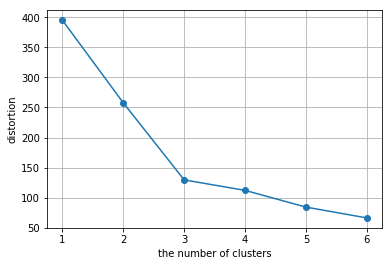

In [9]:
k = 6
a = np.zeros(k)

for i in range(k):
    a[i] = kmeans(data[:, 2:4], i+1)[-1]

plt.plot(np.arange(1, k+1, 1), a, '-o')
plt.ylabel('distortion')
plt.xlabel('the number of clusters')
plt.grid(True)
plt.show()

elbow method k = 3

[[1.93770055 1.52613018]
 [4.00504422 1.9552598 ]
 [2.50900124 3.28005976]]


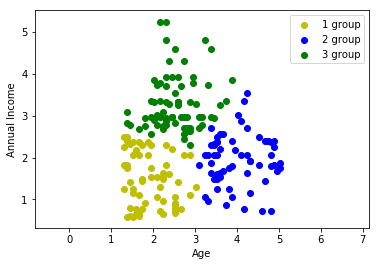

In [10]:
from scipy.cluster.vq import whiten
codebook = np.resize(kmeans(data[:, 2:4], 3)[:-1], [3, 2])
print(codebook)

a = whiten(data[:, 2:4])
(M, N) = a.shape
b = np.arange(M)
for i in range(M) :
    b[i] = np.argmin(np.linalg.norm(codebook-a[i], None, 1, True)) 
    
x = np.hstack((a, np.reshape(b, (M, 1))))

group1 = x[x[:, -1] == 0]
group2 = x[x[:, -1] == 1]
group3 = x[x[:, -1] == 2]

plt.scatter(group1[:, 0], group1[:, 1], c='y', label='1 group')
plt.scatter(group2[:, 0], group2[:, 1], c='b', label='2 group')
plt.scatter(group3[:, 0], group3[:, 1], c='g', label='3 group')
plt.axis('equal')
plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.legend()
plt.show()

1)молодые с низким годовым доходом   
2)пожилые с низким годовым доходом   
3)люди средних лет с высоким годовым доходом

Возраст - покупательский индекс

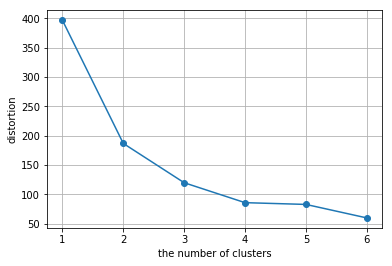

In [11]:
k = 6
a = np.arange(k)

for i in range(k):
    a[i] = kmeans(data[:, [2,4]], i+1)[-1]
plt.plot(np.arange(1, k+1, 1), a, '-o')
plt.ylabel('distortion')
plt.xlabel('the number of clusters')
plt.grid(True)
plt.show()

elbow method k = 4

[[2.0243623  1.6532125 ]
 [2.16784896 3.16596521]
 [3.41788862 0.62308605]
 [4.04285682 1.9048446 ]]


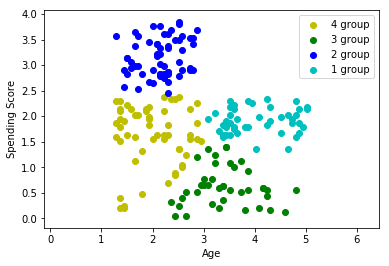

In [17]:
code_book = np.resize(kmeans(data[:, [2,4]], 4)[:-1], [4, 2])
print(code_book)

a = whiten(data[:, [2,4]])
(M, N) = a.shape
b = np.arange(M)
for i in range(M) :
    b[i] = np.argmin(np.linalg.norm(code_book-a[i], None, 1, True)) 
    
x = np.hstack((a, np.reshape(b, (M, 1))))

group1 = x[x[:, -1] == 0]
group2 = x[x[:, -1] == 1]
group3 = x[x[:, -1] == 2]
group4 = x[x[:, -1] == 3]

plt.scatter(group1[:, 0], group1[:, 1], c='y', label='4 group')
plt.scatter(group3[:, 0], group3[:, 1], c='g', label='3 group')
plt.scatter(group2[:, 0], group2[:, 1], c='b', label='2 group')
plt.scatter(group4[:, 0], group4[:, 1], c='c', label='1 group')


plt.axis('equal')
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

1)пожилые люди, которые тратят не много и не мало  
2)молодые люди, которые много тратят   
3)люди среднего возраста, которые тратят мало   
4)молодые люди, которые тратят не много и не мало

доход-покупательский индекс

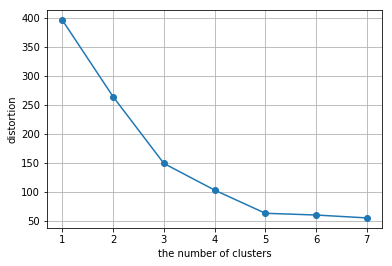

In [65]:
k = 7
a = np.arange(k)

for i in range(k):
    a[i] = kmeans(data[:, 3:5], i+1)[-1]
plt.plot(np.arange(1, k+1, 1), a, '-o')
plt.ylabel('distortion')
plt.xlabel('the number of clusters')
plt.grid(True)
plt.show()

elbow method k=5

[[1.06301796 0.768668  ]
 [1.02103225 3.08243258]
 [3.36654357 0.66440322]
 [3.30312367 3.1883451 ]
 [2.11062807 1.92238617]]


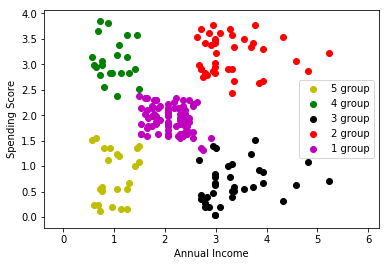

In [19]:
code_book = np.resize(kmeans(data[:, 3:5], 5)[:-1], [5, 2])
print(code_book)

a = whiten(data[:, 3:5])
(M, N) = a.shape
b = np.arange(M)
for i in range(M) :
    b[i] = np.argmin(np.linalg.norm(code_book-a[i], None, 1, True)) 
    
x = np.hstack((a, np.reshape(b, (M, 1))))

group1 = x[x[:, -1] == 0]
group2 = x[x[:, -1] == 1]
group3 = x[x[:, -1] == 2]
group4 = x[x[:, -1] == 3]
group5 = x[x[:, -1] == 4]

plt.scatter(group1[:, 0], group1[:, 1], c='y', label='5 group')
plt.scatter(group2[:, 0], group2[:, 1], c='g', label='4 group')
plt.scatter(group3[:, 0], group3[:, 1], c='black', label='3 group')
plt.scatter(group4[:, 0], group4[:, 1], c='r', label='2 group')
plt.scatter(group5[:, 0], group5[:, 1], c='m', label='1 group')


plt.axis('equal')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

1)что-то среднее   
2)много зарабатывают и много тратят   
3)много зарабатывают и мало тратят   
4)мало зарабатывают и много траят   
5)мало зарабатывают и мало тратят